# Final Project: Data Science Workflow
## Classifiers
### The assignment is due on Wednesday, May 13th at 11:59pm PST.

**Collaborators**: Ke Ma; Chrystal Chen; Andrew Yeskoo

## This Assignment
http://www.ds100.org/sp20/resources/assets/final_proj/final_proj_spec.pdf

Chosen dataset: Covid-19

## Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [4]:
states    = pd.read_csv('original_covid19/4.18states.csv')
counties   = pd.read_csv('original_covid19/abridged_counties.csv')
confirmed = pd.read_csv('original_covid19/time_series_covid19_confirmed_US.csv')
deaths    = pd.read_csv('original_covid19/time_series_covid19_deaths_US.csv')

In [5]:
display(states.head())
display(counties.head())
display(confirmed.head())
display(deaths.head())

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


## Question Framing
1. Are there differences in the spread based on region? (areas of country, urban/rural, republican/democrat governor, rate of health insurance)
2. What interventions are most strongly correlated with changing how fast coronavirus spreads in a region? Can we quantify the relative success or lack thereof of the various interventions?
3. What "output" dominates / is most important? (total cases, active cases, deaths, hospitalization...?)
4. Can the above factors be used to predict future trends in data (test positives, deaths, mortality rate, etc.)? What factors dominate - demographics (static), interventions (active)?
5. What kind of model and features is best for modeling the number of coronavirus cases in a region? Can historical trends inform our predictions on the number of coronavirus cases in a given day?

X. Can we quantify how much more or less actionable items (e.g. testing, stay-at-home orders, and business/social gathering regulations), in comparison to non-actionable items (e.g. population, proportion of pre-existing health conditions) affect spread rate, death rate, and recovery rate of coronavirus in a region?  Can we quantify the relative success or lack thereof of the various interventions?
X. What kind of model and features is best for modeling the number of coronavirus cases in a region? Can historical trends inform our predictions on the number of coronavirus cases in a given day?

1. What were two or three of the most interesting features you came across for your particular question?
2. Describe one feature you thought would be useful, but turned out to be ineffective.
3. What challenges did you find with your data? Where did you get stuck?
4. What are some limitations of the analysis that you did? What assumptions did you make that could prove to be incorrect?
5. What ethical dilemmas did you face with this data?
6. What additional data, if available, would strengthen your analysis, or allow you test some other hypothesises?
7. What ethical concerns might you encounter in studying this problem? How might you address those concerns?

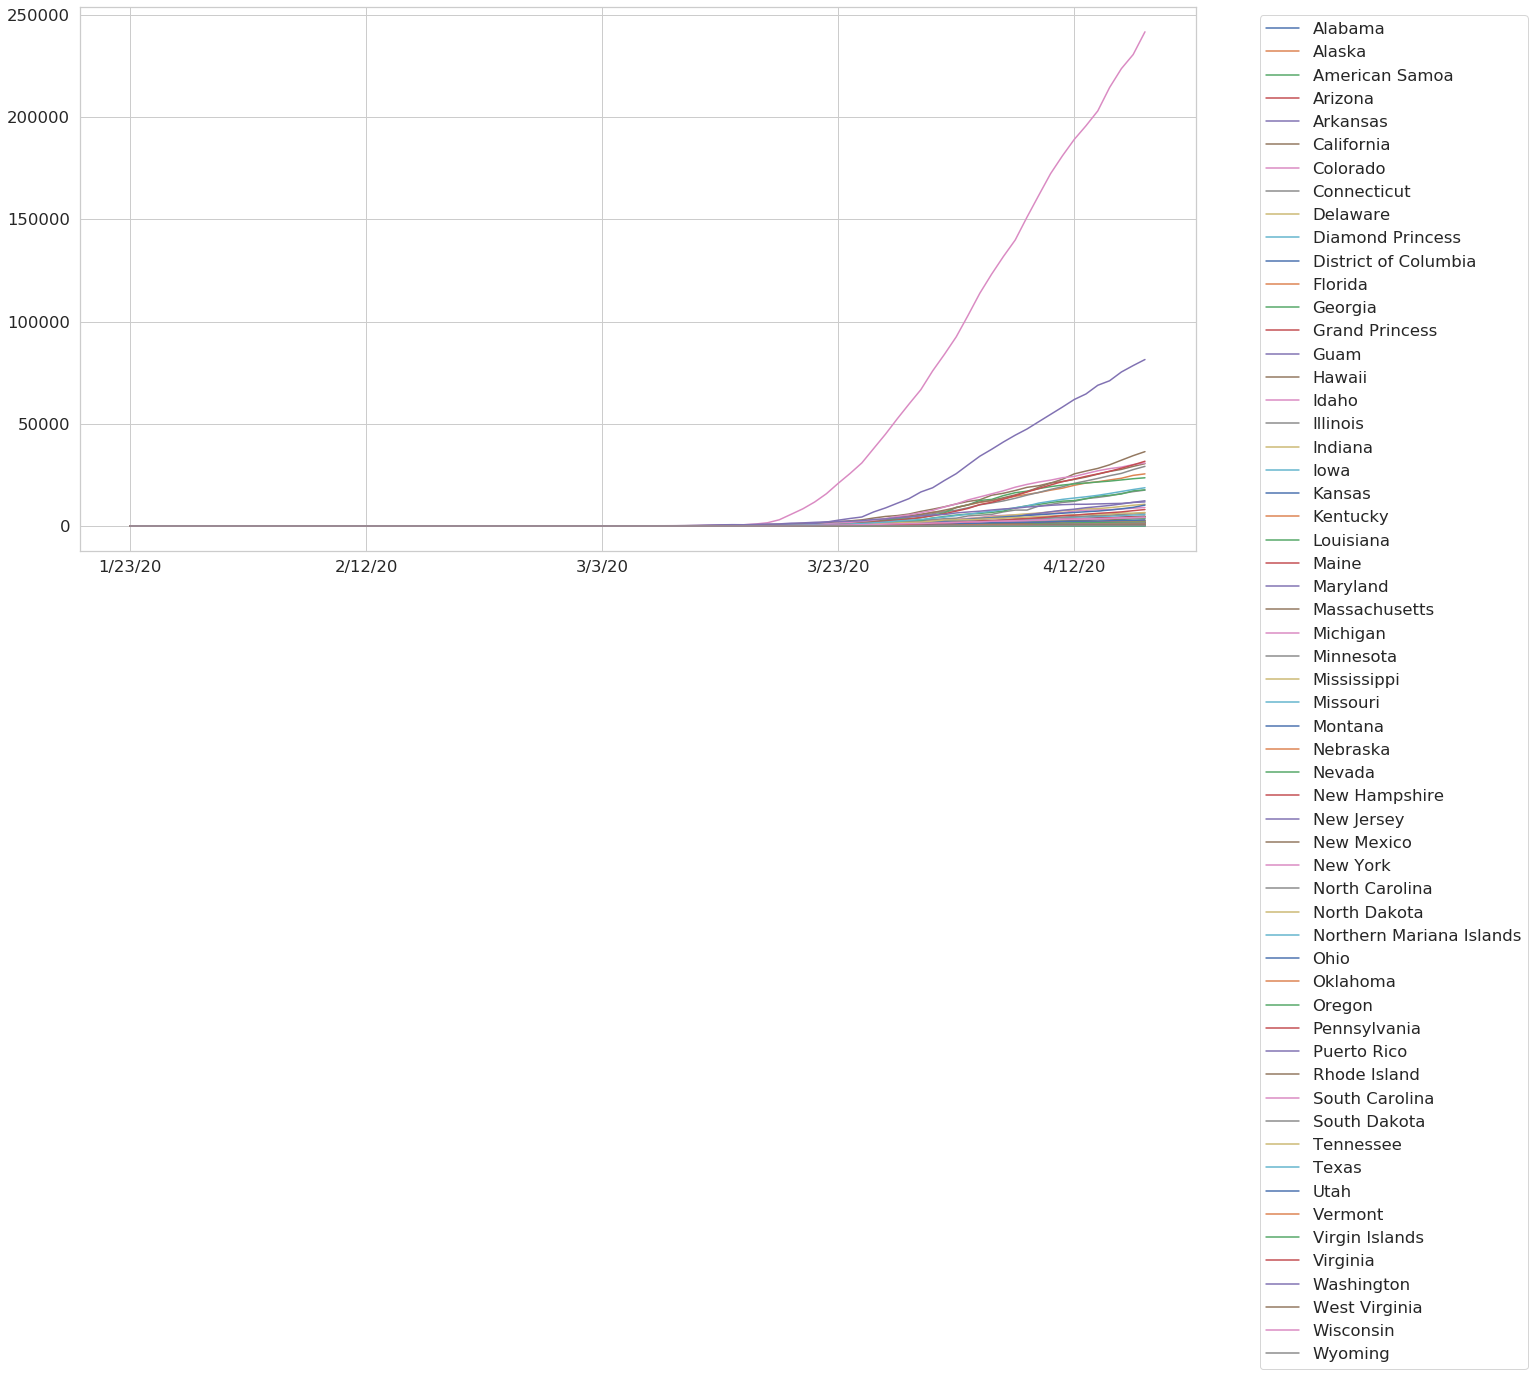

In [53]:
confirmedTS = confirmed.set_index('Province_State').iloc[:,11:].groupby('Province_State').sum()
confirmedTS.T.plot(figsize=[20,10])
plt.legend(bbox_to_anchor=(1.05, 1));

## Data Cleaning

1. Summary metrics of provided data (by table)
2. Initial selection of subdata, initial cleaning
3. Merge, pivot, combinations
4. A few simple EDA visuals

## Data Visualization 

1. Heatmap (like SF food inspection, looking at metrics by county?) (A)
2. Comparisions of demographics (geographic location, urban/rural, state govn't party?) (A)
3. Time series analysis (X)
4. Output variables (all)
5. Intervention vs. rates (M)

## Method and Experiments

## Analysis and Conclusion